<a href="https://colab.research.google.com/github/123prashanth123/Fault-Detection-System/blob/main/Image%20Processing%20Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

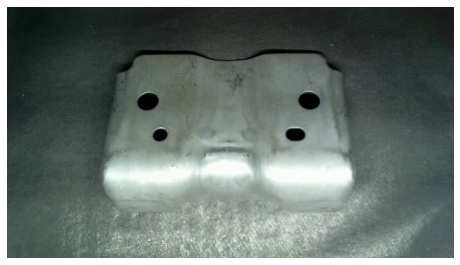

In [ ]:
image = cv2.cvtColor(src=cv2.imread("/content/Image_1_2.jpg"), code=cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis("off")
plt.show()

In [ ]:
class ImageProcess(object):
    def __init__(self):
        pass
    
    def ae(self, image, clipLimit=2.0, TGS=2):
        n_img = image.copy()
        clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=(TGS, TGS))
        for i in range(3):
            n_img[:, :, i] = clahe.apply(n_img[:, :, i])
        return n_img
    
    def he(self, image):
        n_img = image.copy()
        for i in range(3):
            n_img[:, :, i] = cv2.equalizeHist(n_img[:, :, i])
        return n_img
    
    def gamma(self, image, gamma=0):
        n_img = image.copy()
        n_img = n_img/255
        return ((n_img ** gamma) * 255).astype("uint8")

    def sat(self, image, saturation=1):
        n_img = image.copy()
        n_img = cv2.cvtColor(src=n_img, code=cv2.COLOR_RGB2HSV)
        feature = n_img[:, :, 1]
        feature = np.clip((saturation * feature), 0, 255).astype("uint8")
        n_img[:, :, 1] = feature
        return cv2.cvtColor(src=n_img, code=cv2.COLOR_HSV2RGB)

    def vib(self, image, vibrance=1):
        n_img = image.copy()
        n_img = cv2.cvtColor(src=n_img, code=cv2.COLOR_RGB2HSV)
        feature = n_img[:, :, 2]
        feature = np.clip((vibrance * feature), 0, 255).astype("uint8")
        n_img[:, :, 2] = feature
        return cv2.cvtColor(src=n_img, code=cv2.COLOR_HSV2RGB)
    

IP = ImageProcess()

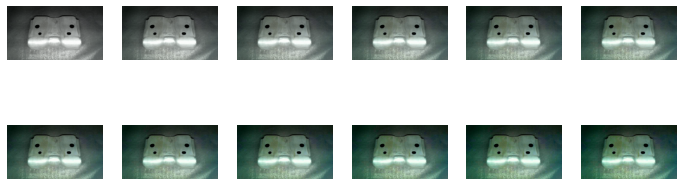

In [ ]:
saturations = [0.25*i for i in range(1, 13)]

sat_images = []
for saturation in saturations:
    sat_images.append(IP.sat(image, saturation=saturation))

plt.figure(figsize=(12, 4))
for i in range(len(sat_images)):
    plt.subplot(2, 6, i+1)
    plt.imshow(sat_images[i])
    plt.axis("off")
plt.show()

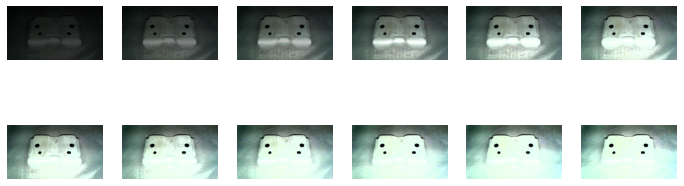

In [ ]:
vibrances = [0.25*i for i in range(1, 13)]

vib_images = []
for vibrance in vibrances:
    vib_images.append(IP.vib(image, vibrance=vibrance))

plt.figure(figsize=(12, 4))
for i in range(len(vib_images)):
    plt.subplot(2, 6, i+1)
    plt.imshow(vib_images[i])
    plt.axis("off")
plt.show()

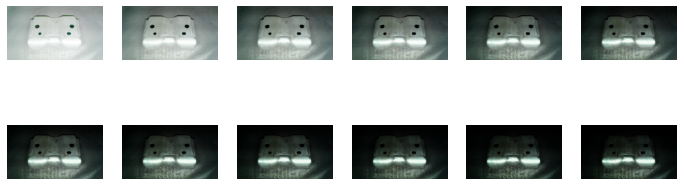

In [ ]:
gammas = [0.25*i for i in range(1, 13)]

gam_images = []
for gamma in gammas:
    gam_images.append(IP.gamma(image, gamma=gamma))

plt.figure(figsize=(12, 4))
for i in range(len(gam_images)):
    plt.subplot(2, 6, i+1)
    plt.imshow(gam_images[i])
    plt.axis("off")
plt.show()

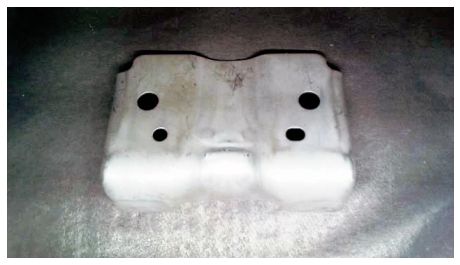

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(IP.he(image))
plt.axis("off")
plt.show()

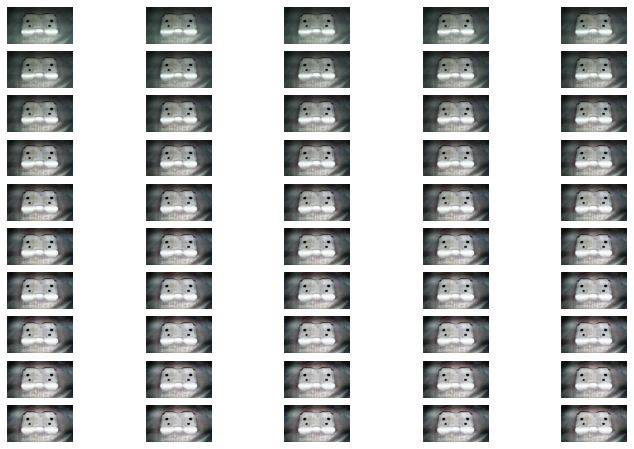

In [ ]:
CLS = [0.1*i for i in range(1, 51)]

ae_images = []
for clipLimit in CLS:
    ae_images.append(IP.ae(image, clipLimit=clipLimit))

plt.figure(figsize=(12, 8))
for i in range(len(ae_images)):
    plt.subplot(10, 5, i+1)
    plt.imshow(ae_images[i])
    plt.axis("off")
plt.show()

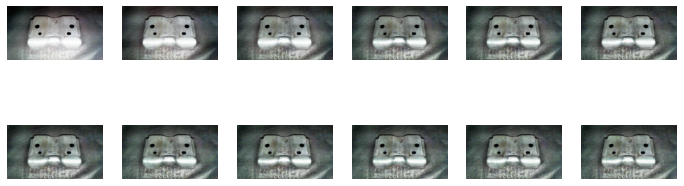

In [ ]:
TGSS = [i for i in range(1, 13)]

tgs_images = []
for TGS in TGSS:
    tgs_images.append(IP.ae(image, TGS=TGS))

plt.figure(figsize=(12, 4))
for i in range(len(tgs_images)):
    plt.subplot(2, 6, i+1)
    plt.imshow(tgs_images[i])
    plt.axis("off")
plt.show()